This project seeks to create a Neural Network Model which would help in predicting Fahrenheit values from Celsius.

In [1]:
# Import TensorFlow, Sklearn, NumPy, Matplotlib
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create the training data
celsius = np.array([-40,	-38,	-32,	-31,	-25,	-19,	-17,	-11,	-8,	-6,	-5,
                    -4,	-2,	0,	1,	2,	4,	5,	7,	9,	13,	17,	19,	26,	27,	28,
                    32,	33,	36,	39,	40,	41,	43,	49,	50,	52,	56,	58,	59,	63,	65,
                    70,	76,	79,	83,	88,	91,	96,	99,	100], dtype=float)

fahrenheit = np.array([-40,	-36.4,	-25.6,	-23.8,	-13,	-2.2,	1.4,	12.2,	17.6,
                       21.2,	23,	24.8,	28.4,	32,	33.8,	35.6,	39.2,	41,	44.6,
                       48.2,	55.4,	62.6,	66.2,	78.8,	80.6,	82.4,	89.6,	91.4,
                       96.8,	102.2,	104,	105.8,	109.4,	120.2,	122,	125.6,
                       132.8,	136.4,	138.2,	145.4,	149,	158,	168.8,	174.2,
                       181.4,	190.4,	195.8,	204.8,	210.2,	212], dtype=float)

In [3]:
# Perform train-test split
celsius_train, celsius_test, fahrenheit_train, fahrenheit_test = train_test_split(celsius, fahrenheit, test_size=0.2, random_state=42)


Model Creation

In [4]:
# Create the model with two hidden layers and one output layer

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=64, input_shape=[1]),  # Add a hidden layer with 64 units
  tf.keras.layers.Dense(units=128, activation='relu'),  # Add another hidden layer with 128 units and ReLU activation
  tf.keras.layers.Dense(units=1)  # Output layer
])

In [5]:
# Compile the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
# Train the model for 500 epochs with 20% validation split
history = model.fit(celsius_train, fahrenheit_train, epochs=500, validation_split=0.2, verbose = False)

Model Evaluation

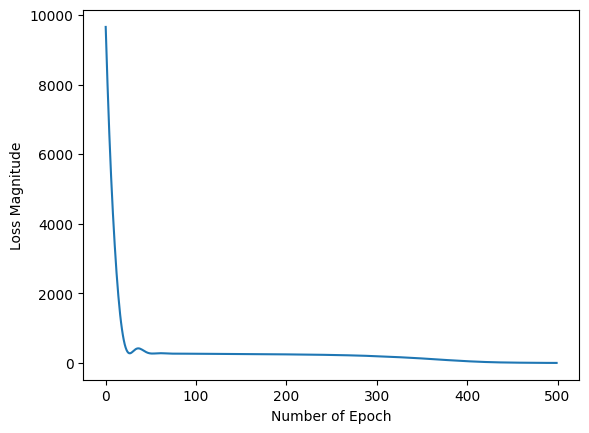

In [7]:
#create a graph showing the number of epochs and the magnitude of loss
plt.xlabel('Number of Epoch')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

In [8]:
# Test the model with some random Celsius values
pred = model.predict(celsius_test)



1/1 [==============================] - 0s 72ms/step


In [9]:
celsius_test

array([ 0., 63., 40., 88.,  5., 99., 32., 28., 43.,  9.])

In [10]:
# Print the results
print("Predicted Fahrenheit values:")
print(pred)


Predicted Fahrenheit values:
[[ 28.58938]
 [145.45859]
 [102.37241]
 [192.29143]
 [ 36.80239]
 [212.915  ]
 [ 87.3859 ]
 [ 79.89265]
 [107.99235]
 [ 44.29971]]


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the evaluation metrics
mse = mean_squared_error(fahrenheit_test, pred)
mae = mean_absolute_error(fahrenheit_test, pred)
r2 = r2_score(fahrenheit_test, pred)
root_mean_squared_error = np.sqrt(mean_squared_error(fahrenheit_test, pred))
mean_absolute_percentage_error = np.mean(np.abs(fahrenheit_test - pred) / fahrenheit_test) * 100

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mean_absolute_percentage_error:", mean_absolute_percentage_error)


Mean Squared Error (MSE): 7.123620532337425
Mean Absolute Error (MAE): 2.3930217361450206
R-squared (R2): 0.9978678946941458
mean_absolute_percentage_error: 86.75215135106792


The low values of MSE and MAE indicate that the model's predictions are close to the actual values. The high R-squared value indicates that the model explains a significant amount of the variance in the target variable. The MAPE value indicates that, on average, the model's predictions have an error of approximately 86% relative to the actual values. Overall, these metrics suggest that the model is accurate and performs well in estimating Fahrenheit temperatures from Celsius temperatures.